In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use("dark_background")
from scipy.ndimage import measurements

In [2]:
def rand_lattice(L: int=20, p: float=0.5):
    """
    It creates a random lattice (matrix of booleans) with size L by L.
    The elements are True with probability (p) and False with probability (q=1-p).
    """


    return np.random.rand(L,L) <= p


def is_percolating(L_by_L):
    """
    checks the percolation of a lattice
    """


    labeled_lattice, num_clusters = measurements.label(L_by_L)
    if np.size(np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0])) == 0:
        return 0
    else:
        return 1


def rgyration(L_by_L):
    """
    Returns an array containing the radii of gyration of all clusters in a lattice.

    float for the radii of gyration of non-spanning clusters.
    NaN for the radii of gyration of spanning clusters.
    """


    L = L_by_L.shape[0]
    labeled_lattice, num_clusters = measurements.label(L_by_L)
    # The next 3 lines are standard syntax for measurements.center_of_mass():
    label_list = np.arange(1, num_clusters+1)
    cm = measurements.center_of_mass(L_by_L, labels=labeled_lattice, index=label_list)
    area = measurements.sum(L_by_L, labeled_lattice, label_list)
    # The distance of every non-zero element in labeled_lattice to the center of mass
    # of its cluster is calculated and then raised to the power of 2, then summed
    # and finally put in the sum_distance2 array.
    # Note that at this step, spanning clusters are also taken into account; they will be
    # eliminated from calculations later in the function.
    sum_distance2 = np.zeros(num_clusters)

    for i in range(L):
        for j in range(L):
            # Which cluster does this element belong to? -1 for iteration purposes.
            cluster_id = labeled_lattice[i,j] - 1
            # Radius of gyration is only defined for clusters that are turned on, so (cluster_id>0),
            # but (cluster_id>=0) is written instead, again, for iteration purposes.
            if (cluster_id>=0):
                # distance to the power of 2:
                distance2 = math.dist(np.array([i,j]), cm[cluster_id]) ** 2
                sum_distance2[cluster_id] = sum_distance2[cluster_id] + distance2


    radii_of_gyration = np.sqrt(sum_distance2 / area)
    # The radii of gyration of non-spanning clusters should not be caculated,
    # so in the end, if a particular cluster_id is spanning, check and put None in its place.
    # If this last for-loop is deleted, the spanning clusters are also accounted for.
    for i in np.intersect1d(labeled_lattice[:,0][labeled_lattice[:,0]>0], labeled_lattice[:,-1][labeled_lattice[:,-1]>0]):
        radii_of_gyration[i-1] = None
    return radii_of_gyration

In [58]:
"""
This data is imported from the notebook for exercise 4.5.
"""


list_max_xis = np.array([0.5630000000000001, 0.5729999999999942, 0.55, 0.55, 0.5551999999999995, 0.55, 0.55])
Ls = np.array([10, 20, 40, 80, 100, 160, 200])

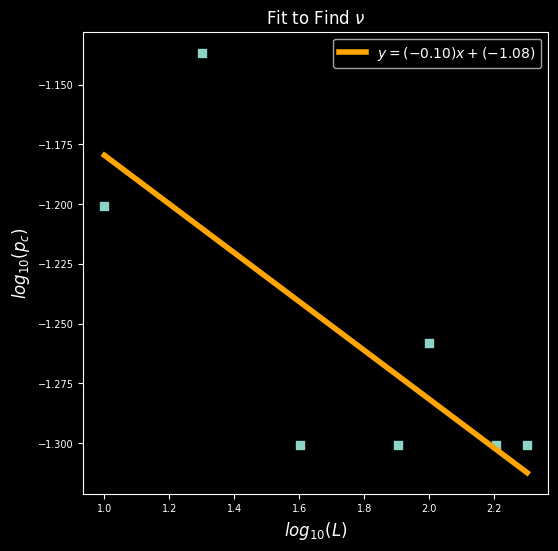

In [80]:
log_list_max_xis = np.log10(list_max_xis - 0.5)
log_Ls = np.log10(Ls)

coefs = np.polynomial.polynomial.polyfit(log_Ls, log_list_max_xis, deg=1)
ffit = np.polynomial.polynomial.polyval(log_Ls, coefs)
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Fit to Find $\\nu$")
ax.tick_params(axis='both', which='major', labelsize=7)
ax.set_xlabel("$log_{10}(L)$", fontsize=12)
ax.set_ylabel("$log_{10}(p_c)$", fontsize=12)
ax.scatter(log_Ls, log_list_max_xis, marker="s")
ax.plot(log_Ls, ffit, color="orange", linewidth=4, label=f"$y = ({coefs[1]:.2f})x + ({coefs[0]:.2f})$")
ax.legend();

In [81]:
# fig.savefig("Plot4_6.jpg")